In [54]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# problem1

In [2]:
# 读取文件
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ds['xch4'].data=ds['xch4'].data*1e9
# Check the data
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 nan nan nan ... nan nan
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

# 1.1

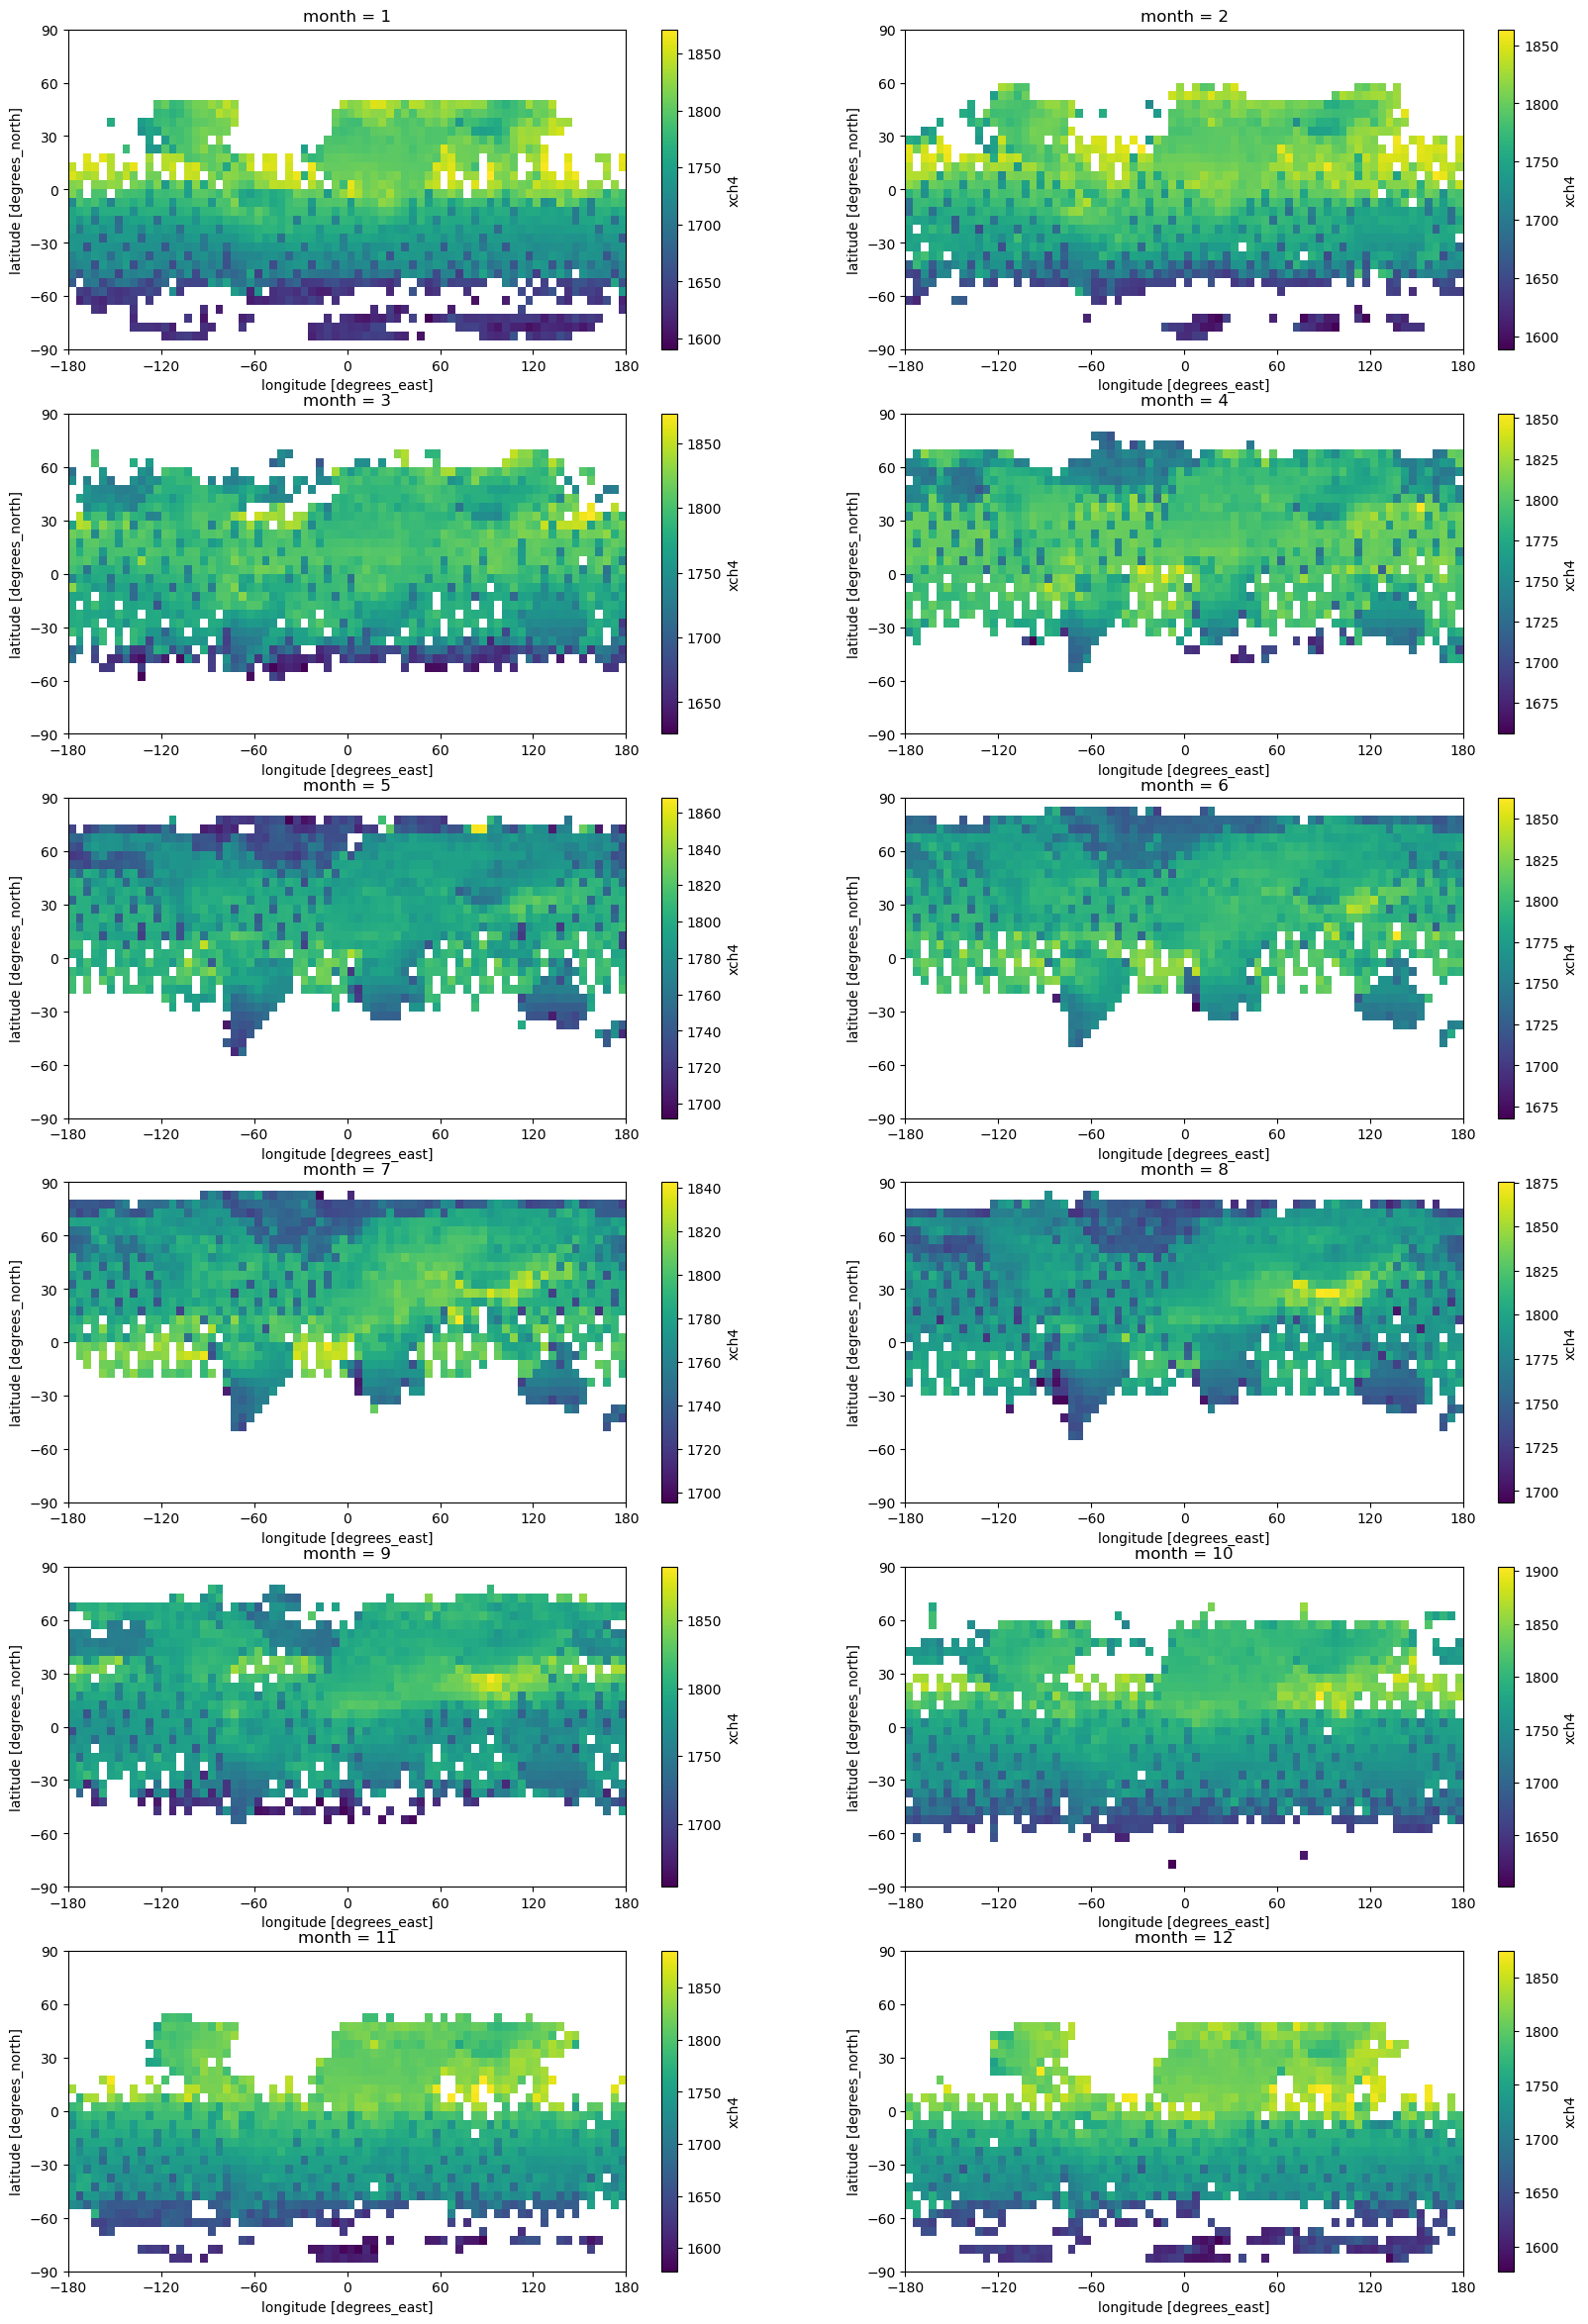

In [6]:
#设置画布，让图片排版得下
plt.figure(figsize=(20,30),dpi=100)
#循环绘制子图，一共12个月
for i in range(12):
    plt.subplot(6,2,i+1)
    #数据为将原始文件按月分组平均后得到
    ds.xch4.groupby(ds.time.dt.month).mean(dim=('time'))[i].plot()
    #将横纵坐标限制在经纬度要求内
    plt.xticks(range(-180,181,60))
    plt.yticks(range(-90,91,30))
plt.show()

# 1.2

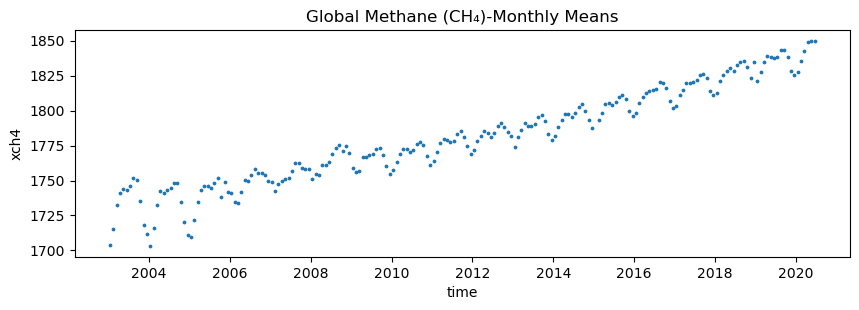

In [9]:
#设置画板
plt.figure(figsize=(10,3),dpi=100)
#ds['time']为x坐标，CH4的平均量为y坐标，绘散点图
plt.scatter(ds['time'].data,ds.xch4.mean(dim=['lat', 'lon']),marker='o',s=3)
plt.xlabel('time')
plt.ylabel('xch4')
plt.title('Global Methane (CH₄)-Monthly Means')
plt.show()

# 1.3

D:\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Anaconda\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


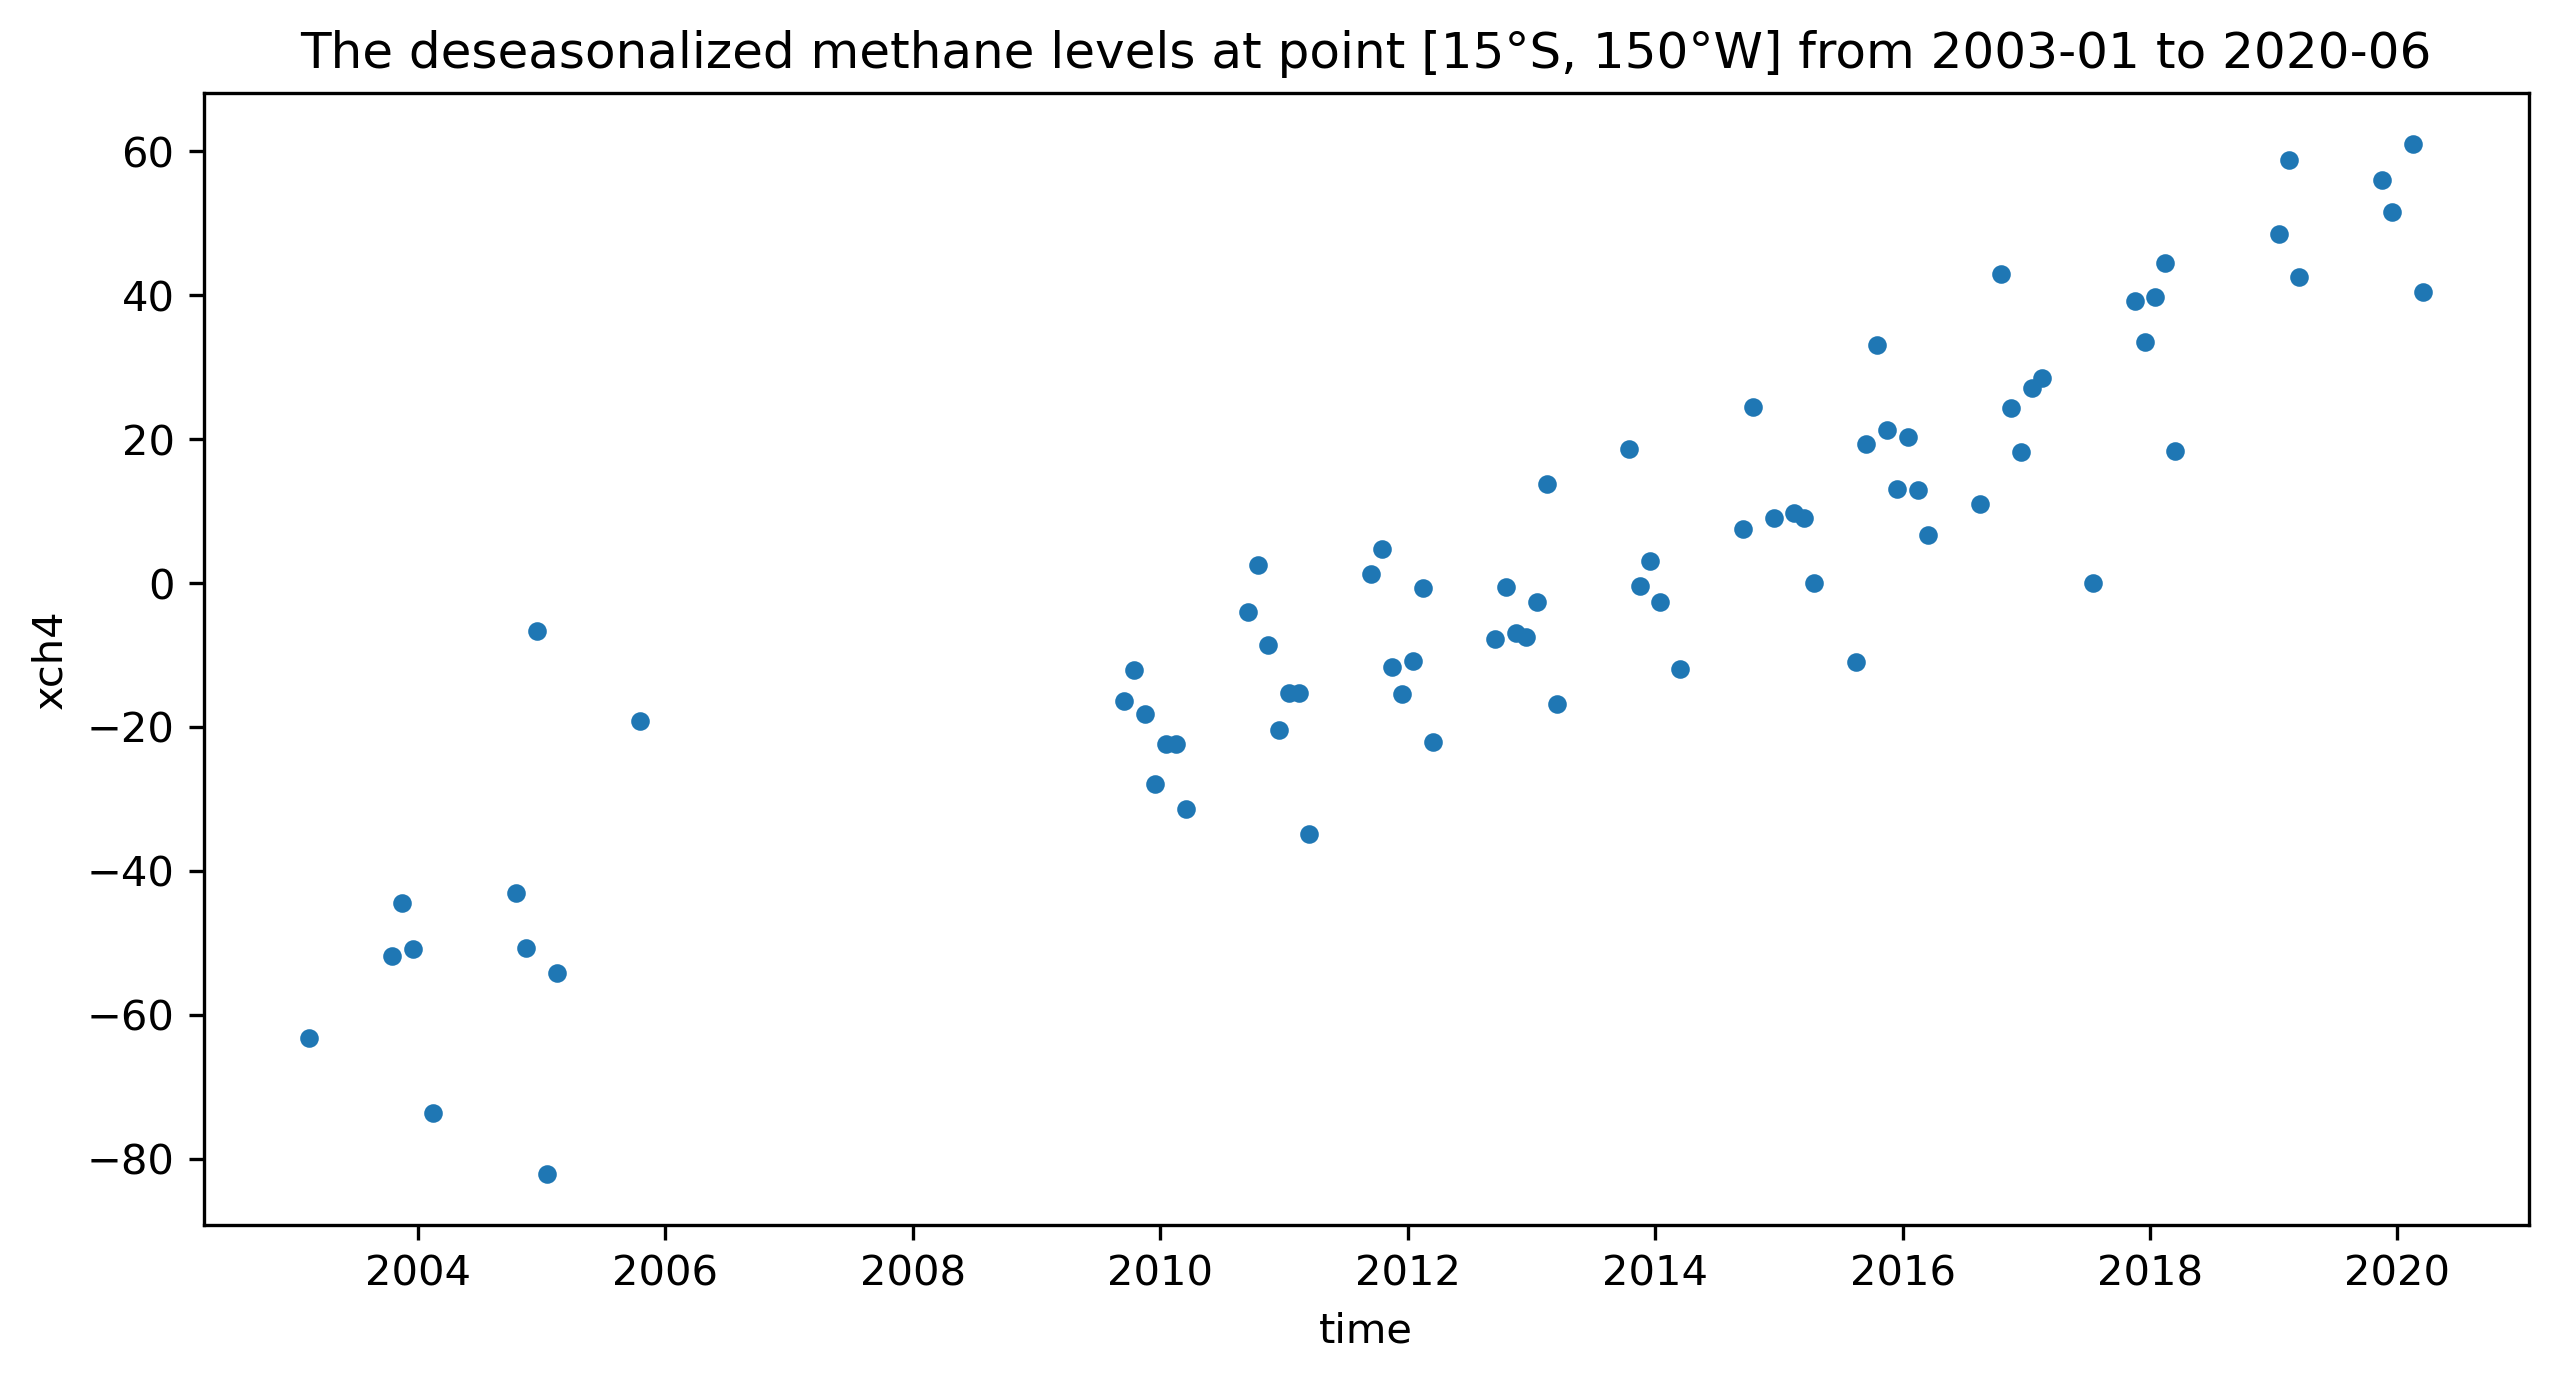

In [10]:
#选择数据point [15°S, 150°W] from 2003-01 to 2020-06
ds1=ds.sel(lat=-15,lon=-150,method='nearest')
#计算CH4数据同均值的差值
ds1=ds1.xch4.groupby(ds.time.dt.month)-ds1.xch4.groupby(ds.time.dt.month).mean(dim=('time'))
#设置画板
plt.figure(figsize=(10,5),dpi=300)
#ds1['time']为x坐标，CH4'与平均量差值为y坐标，绘散点图
plt.scatter(ds1['time'].data,ds1,marker='o',s=12)
plt.xlabel('time')
plt.ylabel('xch4')
plt.title('The deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06')
plt.show()

# problem2

In [11]:
# 读取文件
dn = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
#将经度从0到360变成-180到180
dn['lon']=dn['lon']-180
#筛选计算 Niño 3.4 需要的数据(5N-5S, 170W-120W)
dn=dn.sel(lat=slice(-5,5),lon=slice(-170,-120))
dn

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 -170.0 -168.0 -166.0 -164.0 ... -124.0 -122.0 -120.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

# 2.1

In [12]:
#dn2是数据每个时间点上所有地点的平均值
dn2=dn.groupby(dn.time.dt.month).mean(dim=('lat','lon'))
#dn1是dn2将每个月分组再平均的结果，一共12个月
dn1=dn2.groupby(dn.time.dt.month).mean(dim=('time'))
#将dn2同dn1相同月份的数据相减得到所需的平均差值，使用循环12个月
for i in range(12):
    #i+1是月份
    i=i+1
    #替换dn2中对应i+1月份的sst数值成平均差值
    dn2=xr.where(dn2.time.dt.month!=i,dn2,dn2-dn1.sel(month=i))
#对dn2进行三个月滑动平均得到 Niño 3.4 
dn2=dn2.resample(time="3M").mean()

# 2.2

Text(0, 0.5, 'monthly climatology for SST')

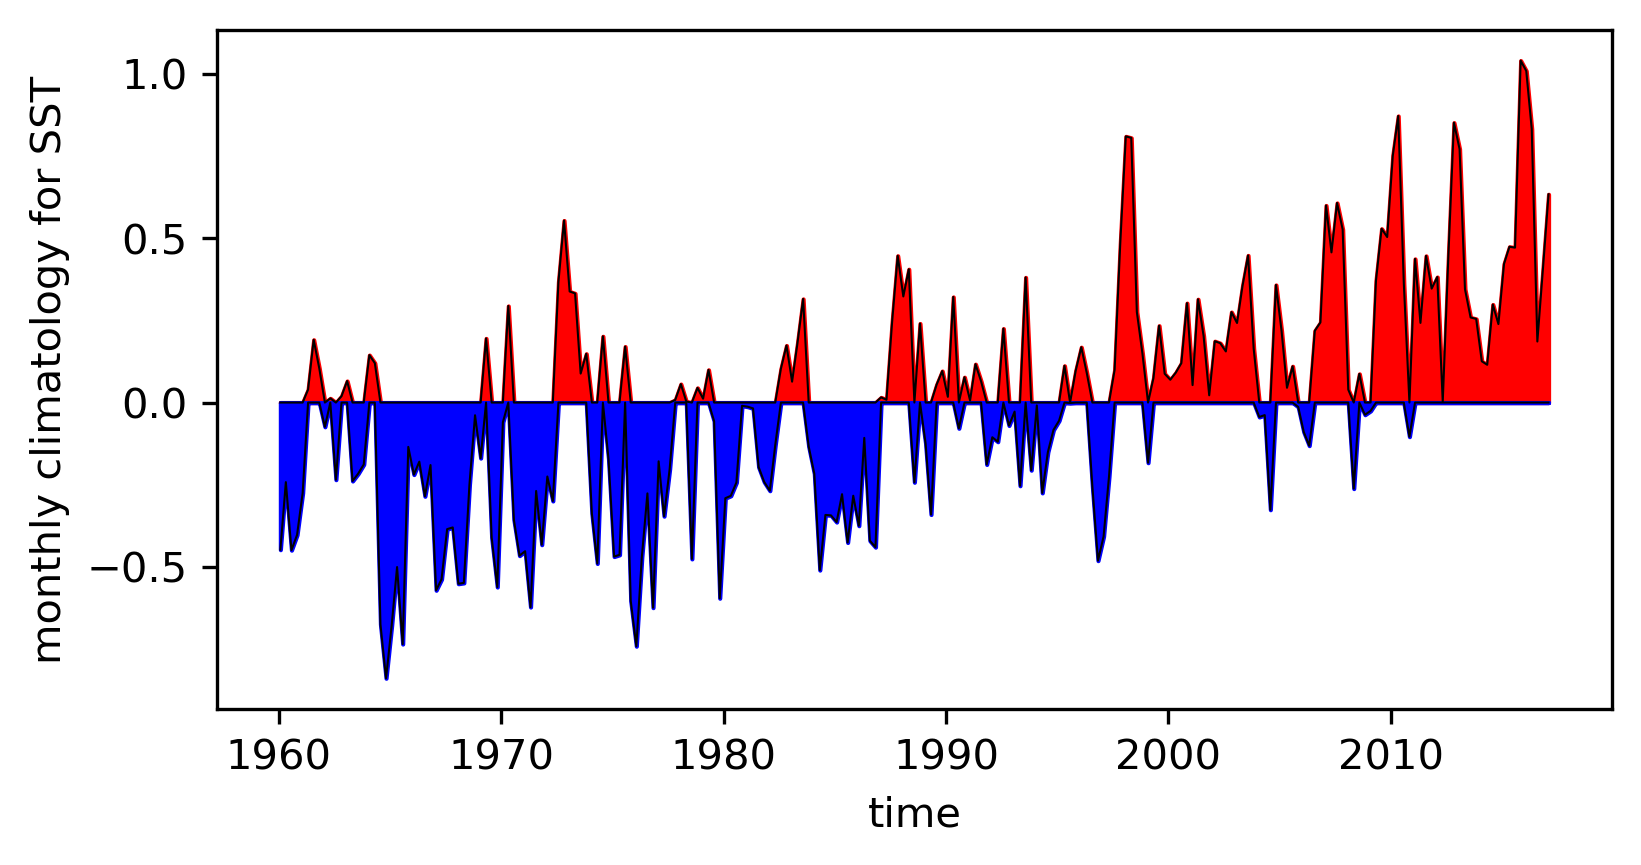

In [13]:
#将dn2内数据拆分成大于0的数据dn3和小于0的数据dn4进行绘图
dn3=xr.where(dn2.sst>0,dn2,0)
dn4=xr.where(dn2.sst<0,dn2,0)
#设置画板
import matplotlib
plt.figure(figsize=(6,3),dpi=300)
#dn2['time']为x坐标，dn3和dn4中相应数据为y坐标，进行绘图
#填充颜色图
matplotlib.pyplot.fill_between(dn3['time'].data,dn3.sst, y2=0,color='r')
matplotlib.pyplot.fill_between(dn4['time'].data,dn4.sst, y2=0,color='b')
#图像的外围添加线
plt.plot(dn3['time'].data,dn3.sst,color='k',linewidth=0.5)
plt.plot(dn4['time'].data,dn4.sst,color='k',linewidth=0.5)
plt.xlabel('time')
plt.ylabel('monthly climatology for SST')

# problem3

In [27]:
# 读取文件
df1 = xr.open_dataset("data1.nc", engine="netcdf4")
#对文件进行处理，原始文件中没有将时间序列放入坐标中，我们将df1内部数据及坐标拆出来进行重组成df,文件处理方法来源于殷玉领讲解
df = df1.mole_fraction_of_carbon_dioxide_in_free_troposphere
time = pd.date_range(start="20020901", end="20120201", freq="MS")
lat=df1.Latitude
lon=df1.Longitude
df = xr.DataArray(df, coords=[time,lat,lon], dims=['time','lat','lon'])
df

<xarray.DataArray 'mole_fraction_of_carbon_dioxide_in_free_troposphere' (time: 114, lat: 76, lon: 144)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.00038273, ...,        nan,
         0.00037496, 0.00037198],
        [0.00037554, 0.00037327, 0.00037272, ..., 0.00037618,
         0.00037342, 0.00037013],
        ...,
        [0.00037303, 0.00037264, 0.00037923, ..., 0.00037069,
         0.00037428, 0.00037382],
        [0.00037393, 0.00037291, 0.00037323, ..., 0.00036721,
         0.00037684, 0.00037241],
        [0.00037163, 0.00037451, 0.0003695 , ..., 0.00037096,
         0.00037377, 0.00037409]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.00037659,        nan, 0.00036975, ...,        nan,
         0.00037152, 0.00036963],
        [0.00037266, 0.00037659, 0.00037248, ..., 0.00037385,
         0.00037253, 0.00037518],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.00038856,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.00040399, ...,        nan,
                nan,        nan],
        [0.00038407, 0.00039642,        nan, ..., 0.00039911,
         0.00039531, 0.00038902],
        ...,
        [0.00039667, 0.00039267, 0.00039268, ..., 0.00039246,
         0.00039634, 0.00039698],
        [0.00039483, 0.00039603, 0.00039424, ..., 0.00039494,
         0.00039138, 0.00040059],
        [0.00039714, 0.00038998, 0.00039354, ...,        nan,
                nan, 0.00039843]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01 2002-10-01 ... 2012-02-01
  * lat      (lat) float32 89.5 88.0 86.0 84.0 82.0 ... -54.0 -56.0 -58.0 -60.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Attributes:
    long_name:  mole_fraction_of_carbon_dioxide_in_free_troposphere

# 3.1

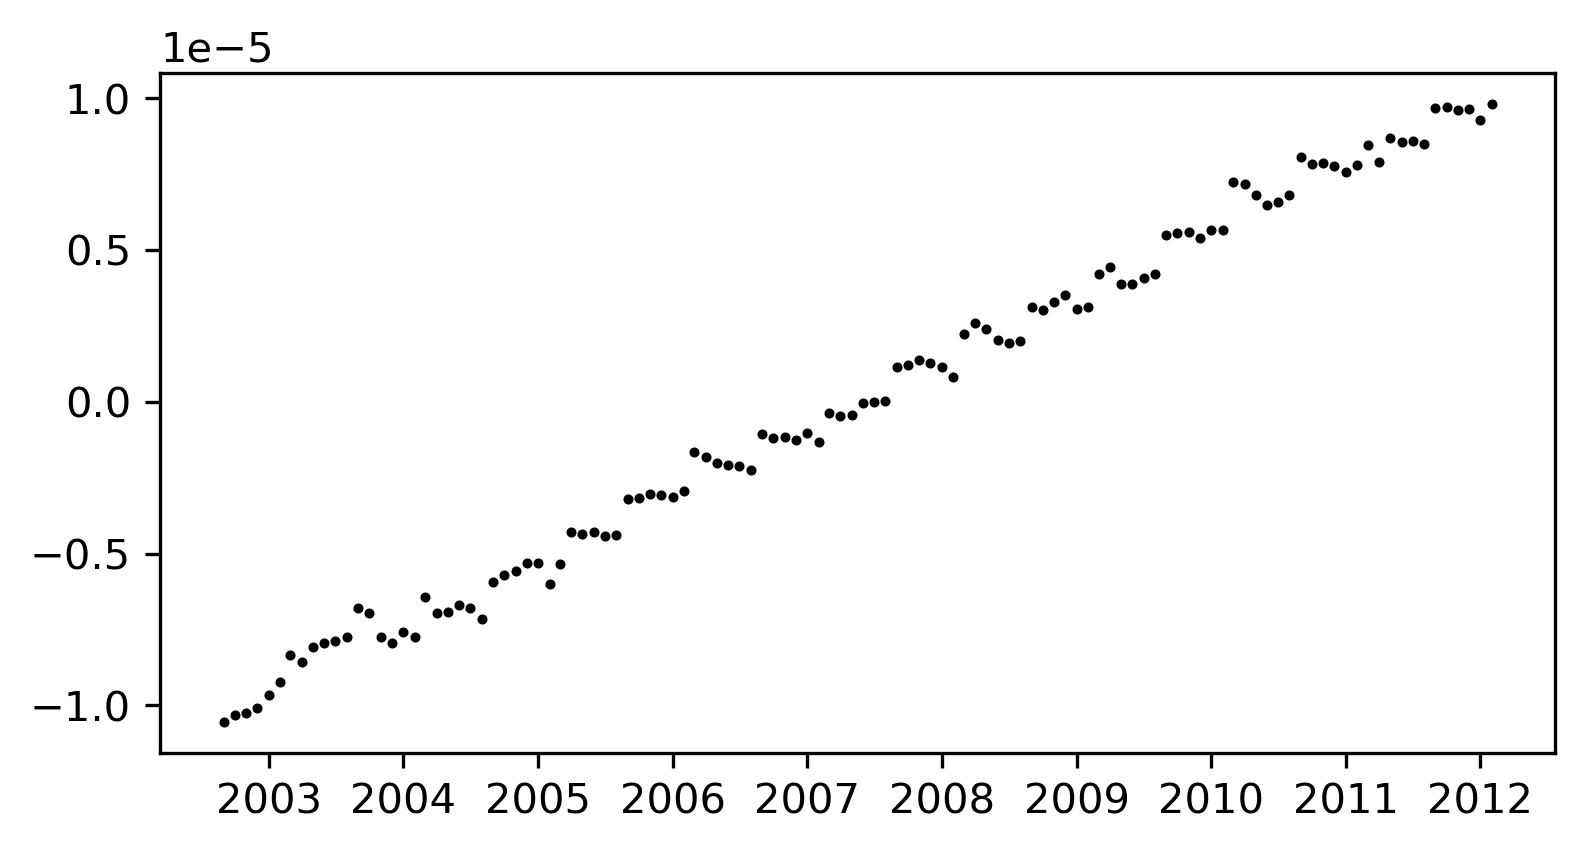

In [37]:
#dn2是数据每个时间点上所有地点的平均值
df2=df.groupby(df.time.dt.month).mean(dim=('lat','lon'))
#df1是df2将每个月分组再平均的结果，一共12个月
df1=df2.groupby(df.time.dt.month).mean(dim=('time'))
#将df2同df1相同月份的数据相减得到所需的平均差值，使用循环12个月
for i in range(12):
    #i+1是月份
    i=i+1
    #替换dn2中对应i+1月份的数值成平均差值
    df2=xr.where(df2.time.dt.month!=i,df2,df2-df1.sel(month=i))
plt.figure(figsize=(6,3),dpi=300)
plt.scatter(df2['time'].data,df2,color='k',s=2)

# 3.2

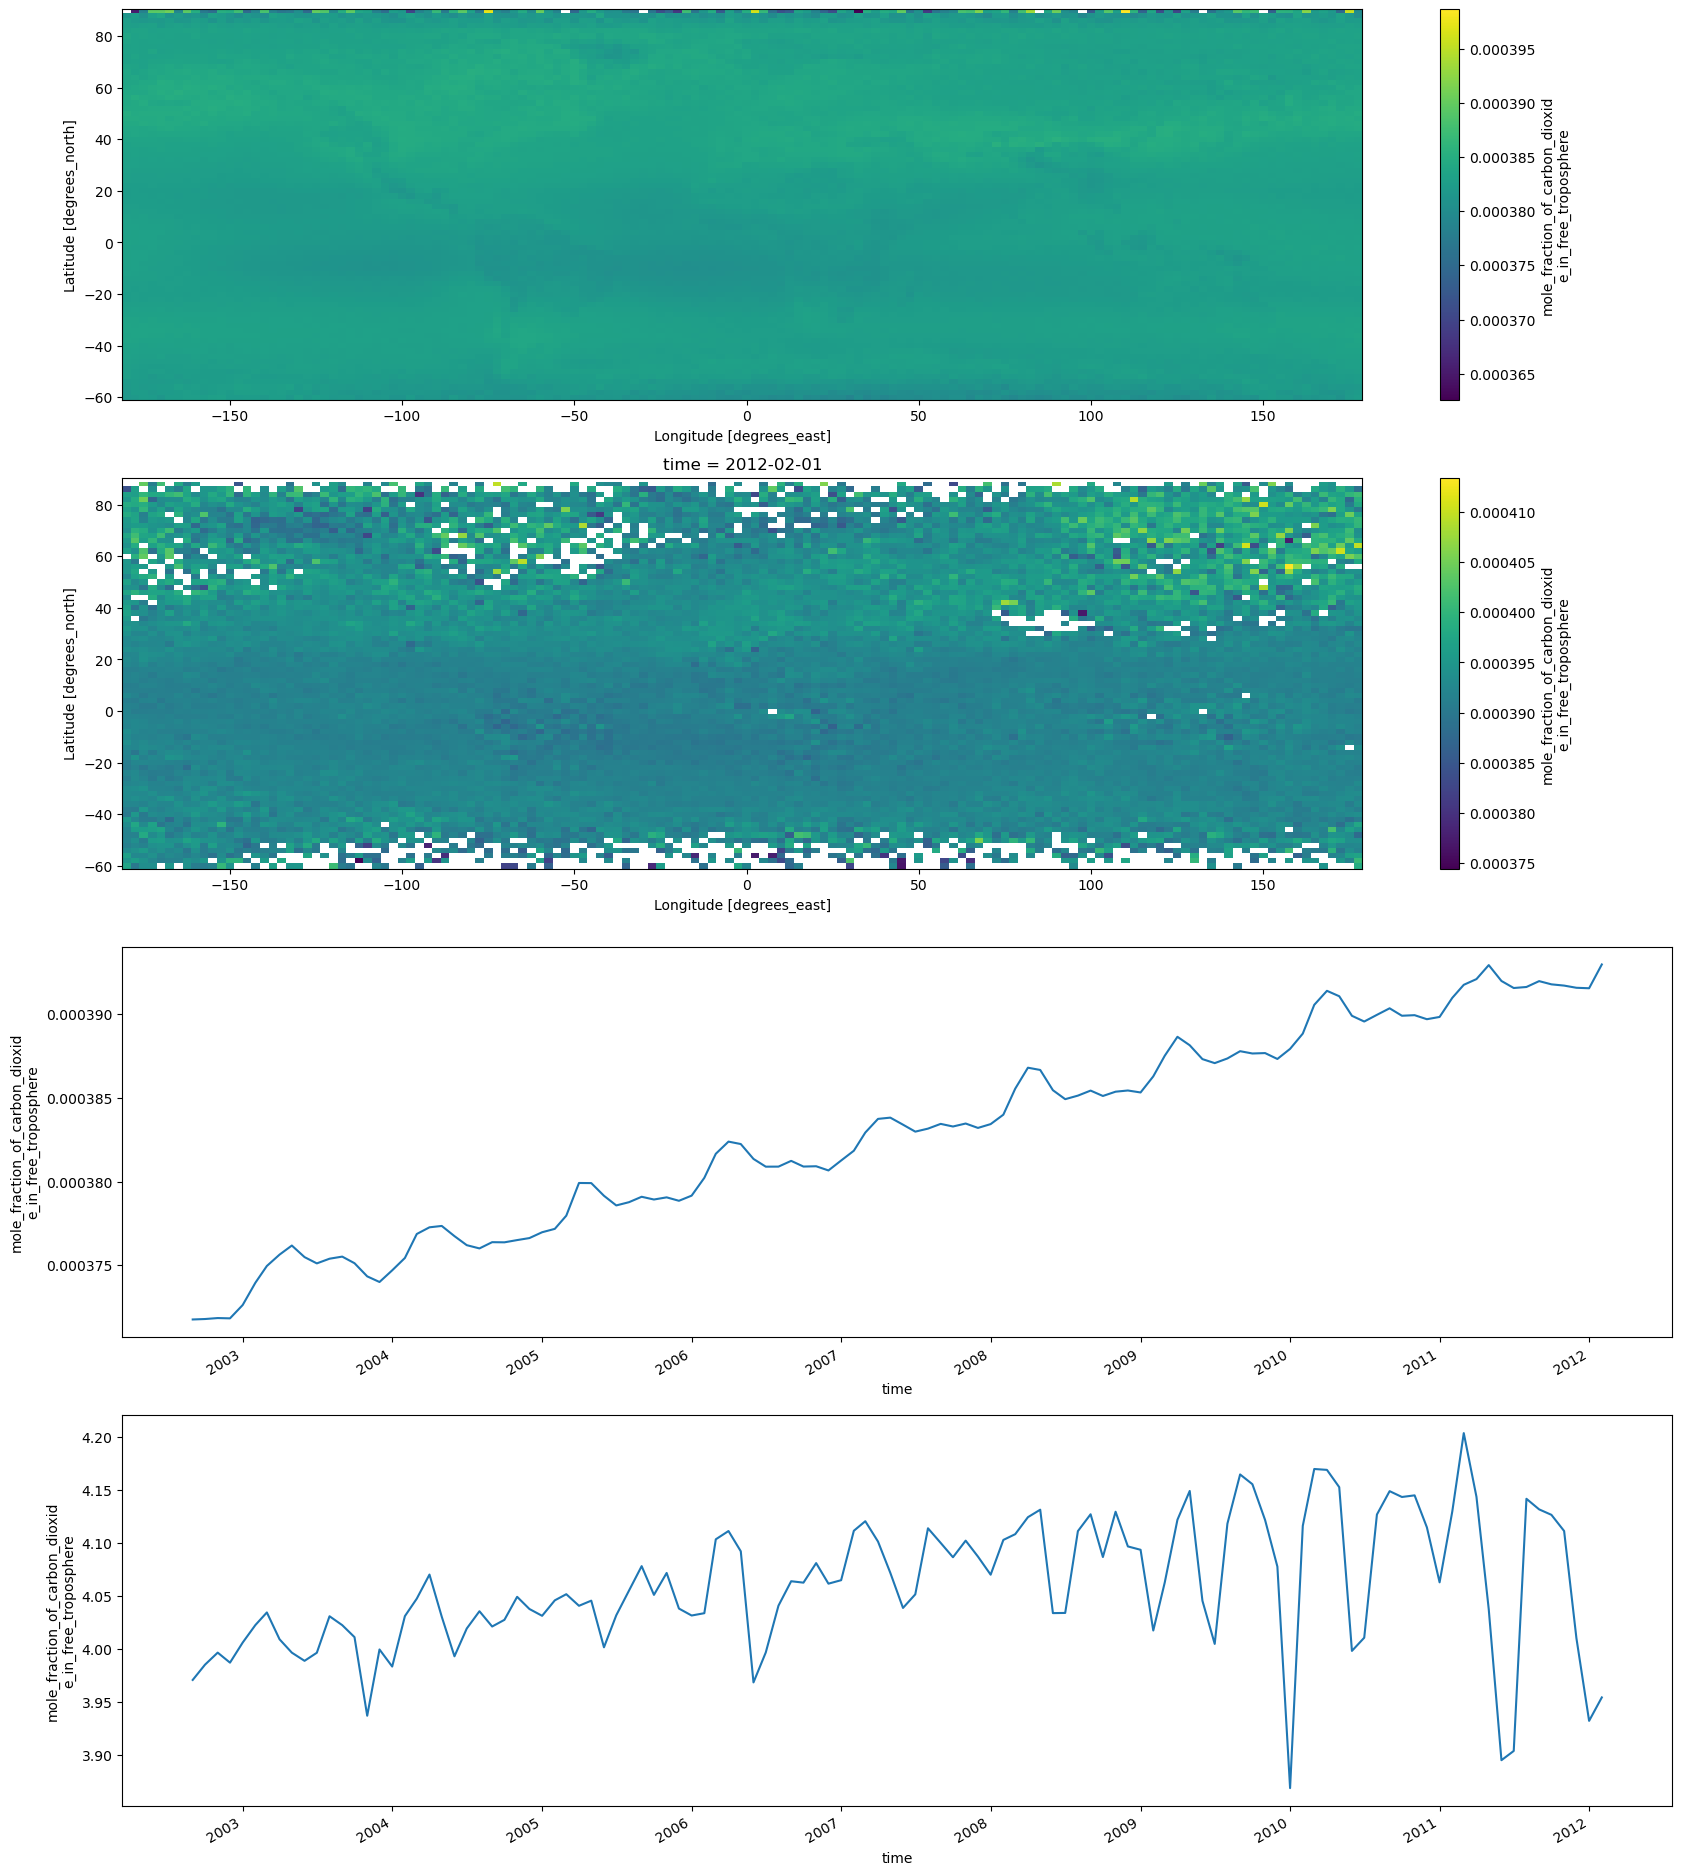

In [65]:
#设置画布，让图片排版得下
plt.figure(figsize=(20,30),dpi=100)
plt.subplot(5,1,1)
#绘制全部数据平均值在全球的分布，各地差别不大
df.mean(dim=('time')).plot()
plt.subplot(5,1,2)
#绘制全球co2在最近数据的分布图，分布比较均匀，图中显示部分地区缺少测量数据
df.sel(time='2012-02-01').plot()
plt.subplot(5,1,3)
#绘制全球co2随时间变化总和变化,存在时间波动，但是整体有上升趋势
df.mean(dim=('lat','lon')).plot()
plt.subplot(5,1,4)
#绘制数据总和随着时间变化，同上图的平均值存在不同，整体波动较大，可能是因为部分时间数据点缺失严重导致
df.sum(dim=('lat','lon')).plot()
plt.show()

D:\Anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\Anaconda\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will

Text(0.5, 1.0, 'No mask data only')

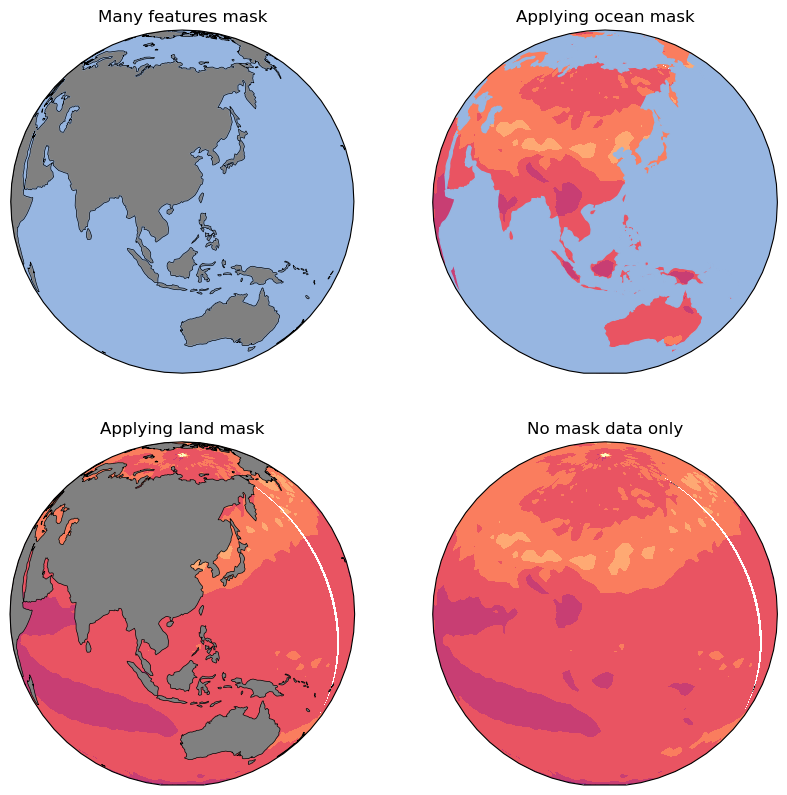

In [60]:
#fig5是以深圳为中心的半球平均co2含量分布图
df0=df.mean(dim=('time'))
# 设置画布 
plt.figure(figsize=(10,10), dpi=100)
central_lon, central_lat = 114.06, 22.54 
# 创建以深圳为中心的半球地图
proj = ccrs.Orthographic(central_lon, central_lat) 

# 绘制陆地及海洋地区分布
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.coastlines(linewidths=0.5)
# 显示陆地和海洋
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',linewidths=0.5)
ax1.add_feature(cfeature.OCEAN)
plt.title("Many features mask")

# 绘制陆地数据
ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.coastlines(linewidths=0.5)
# 添加数据
df0.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),
               vmin=0.000375, vmax=0.000387, levels=11, cmap='magma',
               add_colorbar=False)

# 覆盖海洋地区不显示
ax2.add_feature(cfeature.OCEAN, zorder=1)
plt.title("Applying ocean mask")

# 绘制海洋数据
ax3 = plt.subplot(2, 2, 3, projection=proj)
ax3.coastlines(linewidths=0.5)
# 添加数据
df0.plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),
               vmin=0.000375, vmax=0.000387, levels=11, cmap='magma',
               add_colorbar=False)
# 覆盖陆地不显示
ax3.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',
                linewidths=0.5, zorder=1)
plt.title("Applying land mask")

# 绘制半球全部数据
ax4 = plt.subplot(2, 2, 4, projection=proj)
ax4.coastlines(linewidths=0.5)
# 添加数据
df0.plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),
               vmin=0.000375, vmax=0.000387,levels=11, cmap='magma',
               add_colorbar=False)
plt.title("No mask data only")
#数据显示海洋部分地区的co2较多，北半球中高纬度地区呈现条带状低含量地区